In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## Reading data

In [2]:
df = pd.read_csv('E:/Imarticus/Semester 2/Project/spotify_all_genres_tracks.csv')

In [3]:
df.head()

track_id                                       playlist_url  \
0  4Gia17DzXBhYFbYiJj6SyW  https://open.spotify.com/playlist/7qACZGMjyo64...   
1  1BjYNhg7JhVfQdxqEThBwn  https://open.spotify.com/playlist/7qACZGMjyo64...   
2  2Cg3GUkhjX96nO4p2WRlIa  https://open.spotify.com/playlist/7qACZGMjyo64...   
3  5bC6ONDsL88snGN6QasjZH  https://open.spotify.com/playlist/7qACZGMjyo64...   
4  2TKykeHeVKsBqZC8M3SKcN  https://open.spotify.com/playlist/7qACZGMjyo64...   

        playlist_name               track_name  track_popularity  \
0  The Sound of Blues              Working Man                51   
1  The Sound of Blues            Long Way Home                38   
2  The Sound of Blues        She's A Sweet One                49   
3  The Sound of Blues                  Help Me                59   
4  The Sound of Blues  Take Out Some Insurance                51   

                  artist_name  \
0                   Otis Rush   
1  Clarence "Gatemouth" Brown   
2                Junior Wells   
3     Sonny Boy Williamson II   
4                  Jimmy Reed   

                                               album  \
0                            Mourning In The Morning   
1                                      Long Way Home   
2  Calling All Blues - The Chief, Profile & USA R...   
3                               More Real Folk Blues   
4                                  Rockin' With Reed   

                                         album_cover  \
0  https://i.scdn.co/image/ab67616d0000b273fea221...   
1  https://i.scdn.co/image/ab67616d0000b2730e1f13...   
2  https://i.scdn.co/image/ab67616d0000b27399b18c...   
3  https://i.scdn.co/image/ab67616d0000b273b48c81...   
4  https://i.scdn.co/image/ab67616d0000b2739b7573...   

                                       artist_genres  artist_popularity  ...  \
0  ['blues', 'blues rock', 'chicago blues', 'elec...                 41  ...   
1  ['blues', 'blues rock', 'memphis blues', 'mode...                 33  ...   
2  ['blues', 'blues rock', 'chicago blues', 'elec...                 41  ...   
3  ['acoustic blues', 'blues', 'blues rock', 'chi...                 46  ...   
4  ['blues', 'blues rock', 'chicago blues', 'elec...                 42  ...   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0436         0.492          0.000418     0.204    0.841   
1     0       0.0380         0.910          0.048000     0.120    0.425   
2     1       0.0542         0.150          0.026500     0.202    0.713   
3     0       0.0430         0.597          0.021300     0.610    0.771   
4     1       0.0513         0.663          0.000000     0.122    0.566   

     tempo  duration_ms  time_signature  genre  
0  103.355       147800               4  blues  
1   78.033       338333               4  blues  
2  122.863       181786               4  blues  
3  114.216       188200               4  blues  
4  111.330       143332               4  blues  

[5 rows x 24 columns]

In [4]:
df.shape

(9198, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           9198 non-null   object 
 1   playlist_url       9198 non-null   object 
 2   playlist_name      9198 non-null   object 
 3   track_name         9198 non-null   object 
 4   track_popularity   9198 non-null   int64  
 5   artist_name        9198 non-null   object 
 6   album              9198 non-null   object 
 7   album_cover        9198 non-null   object 
 8   artist_genres      9198 non-null   object 
 9   artist_popularity  9198 non-null   int64  
 10  danceability       9198 non-null   float64
 11  energy             9198 non-null   float64
 12  key                9198 non-null   int64  
 13  loudness           9198 non-null   float64
 14  mode               9198 non-null   int64  
 15  speechiness        9198 non-null   float64
 16  acousticness       9198 

In [6]:
df.nunique()

track_id             9126
playlist_url           58
playlist_name          58
track_name           8530
track_popularity       95
artist_name          4015
album                7424
album_cover          7644
artist_genres        3161
artist_popularity      95
danceability          931
energy               1526
key                    12
loudness             7042
mode                    2
speechiness          1061
acousticness         2611
instrumentalness     3131
liveness             1267
valence              1300
tempo                8154
duration_ms          7887
time_signature          5
genre                   8
dtype: int64

In [7]:
df.drop(['track_id'], axis = 1, inplace = True)

In [8]:
df['time_signature'] = df['time_signature'].astype('object')

In [9]:
df.shape

(9198, 23)

In [10]:
df.duplicated().any()

False

In [11]:
df.isnull().sum()

playlist_url         0
playlist_name        0
track_name           0
track_popularity     0
artist_name          0
album                0
album_cover          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
genre                0
dtype: int64

**There's no missing values**

In [12]:
df.describe().transpose()

count           mean            std           min  \
track_popularity   9198.0      48.891716      17.501544      0.000000   
artist_popularity  9198.0      51.161883      16.080915      0.000000   
danceability       9198.0       0.595363       0.192927      0.000000   
energy             9198.0       0.535862       0.273231      0.000885   
key                9198.0       5.359209       3.558963      0.000000   
loudness           9198.0     -10.706267       6.573201    -47.001000   
mode               9198.0       0.596434       0.490639      0.000000   
speechiness        9198.0       0.084681       0.081614      0.000000   
acousticness       9198.0       0.362225       0.368888      0.000002   
instrumentalness   9198.0       0.227429       0.350817      0.000000   
liveness           9198.0       0.170279       0.139707      0.014500   
valence            9198.0       0.502993       0.265940      0.000000   
tempo              9198.0     116.589396      29.270118      0.000000   
duration_ms        9198.0  253282.540444  101973.207722  30333.000000   

                             25%            50%           75%          max  
track_popularity       38.000000      49.000000      61.00000       95.000  
artist_popularity      42.000000      52.000000      62.00000      100.000  
danceability            0.474000       0.621000       0.74400        0.984  
energy                  0.334000       0.578500       0.75700        0.999  
key                     2.000000       6.000000       8.00000       11.000  
loudness              -13.255750      -8.761500      -6.12825        1.342  
mode                    0.000000       1.000000       1.00000        1.000  
speechiness             0.038200       0.049000       0.08750        0.827  
acousticness            0.030425       0.191000       0.73100        0.996  
instrumentalness        0.000002       0.001675       0.46100        0.983  
liveness                0.090100       0.116000       0.19800        0.979  
valence                 0.282000       0.519000       0.72400        0.986  
tempo                  93.983000     117.922500     132.69725      216.090  
duration_ms        189700.750000  228267.000000  286456.75000  1430840.000

In [13]:
df.describe(include = 'object').transpose()

count unique  \
playlist_url    9198     58   
playlist_name   9198     58   
track_name      9198   8530   
artist_name     9198   4015   
album           9198   7424   
album_cover     9198   7644   
artist_genres   9198   3161   
time_signature  9198      5   
genre           9198      8   

                                                              top  freq  
playlist_url    https://open.spotify.com/playlist/6gS3HhOiI17Q...  1251  
playlist_name                                    The Sound of Pop  1251  
track_name                                               Stardust     7  
artist_name                            Positive Reggae Vibrations    47  
album                                               Greatest Hits    10  
album_cover     https://i.scdn.co/image/ab67616d0000b273d34233...     7  
artist_genres                                                  []   162  
time_signature                                                  4  8173  
genre                                                  electronic  1725

In [14]:
# Converting millisec to sec
df ["duration"]= df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms",inplace=True,axis=1)

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = [col for col in df.columns if col not in cat_cols]

In [16]:
df_numeric_features = df.select_dtypes(include=np.number)

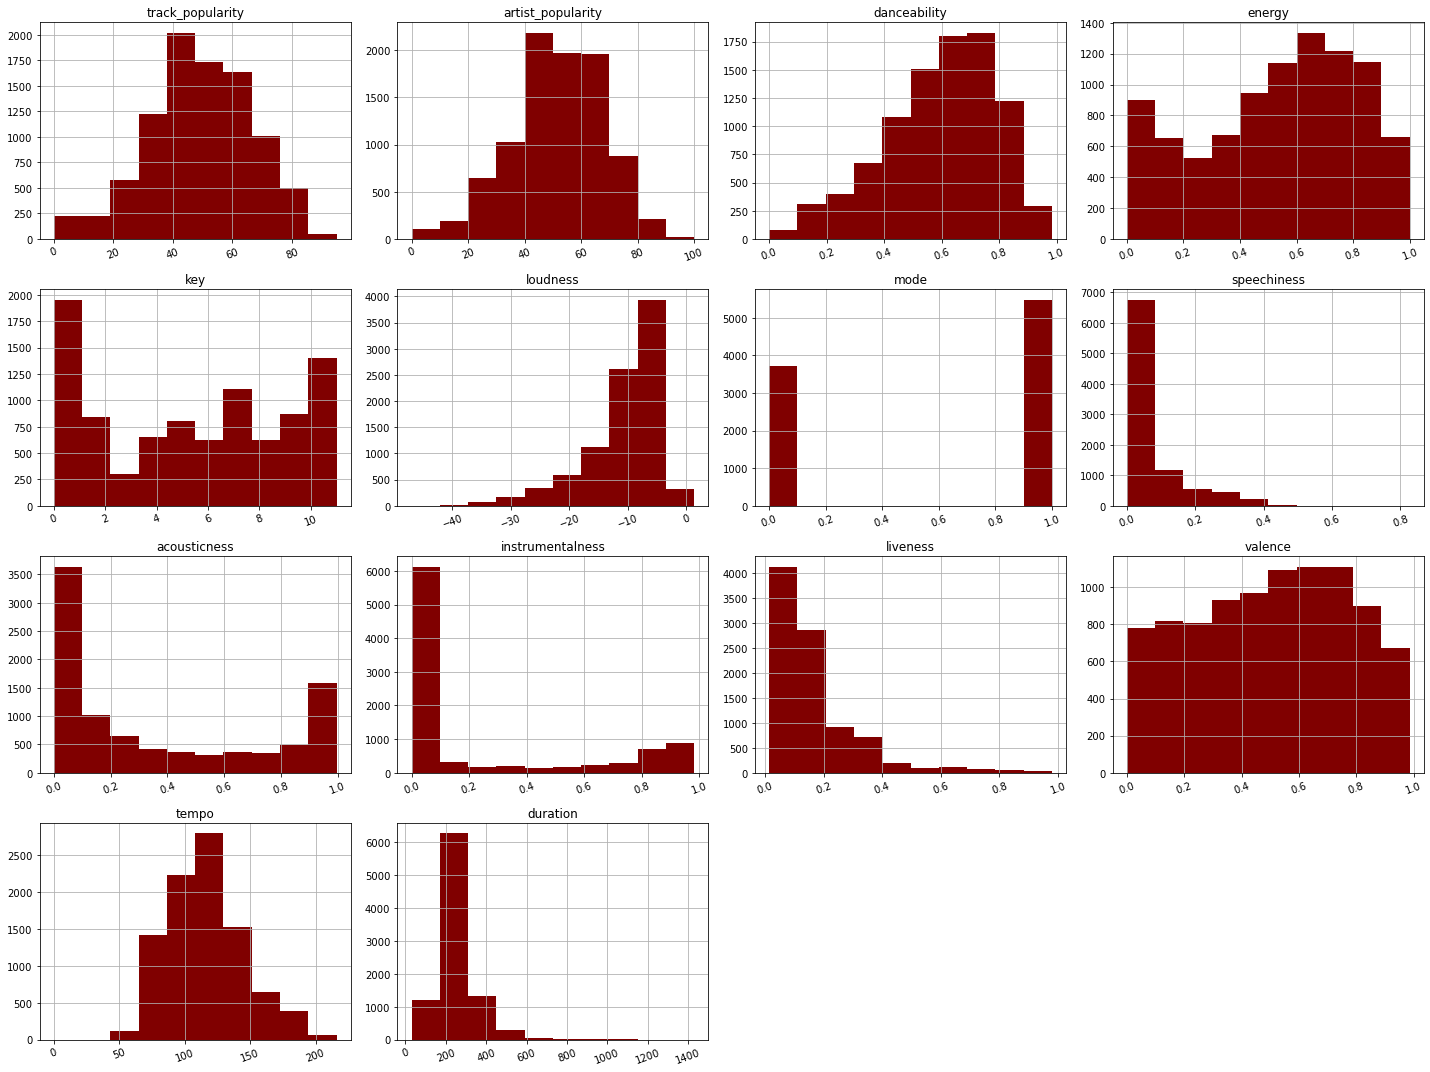

In [17]:
plt.rcParams["figure.figsize"] = [20,15]
df_numeric_features.hist(xrot = 20, color = "maroon")
plt.tight_layout()
plt.show()  

In [18]:
df_cat_features = df.select_dtypes(include='object')

In [19]:
cat_cols

['playlist_url',
 'playlist_name',
 'track_name',
 'artist_name',
 'album',
 'album_cover',
 'artist_genres',
 'time_signature',
 'genre']

In [20]:
num_cols

['track_popularity',
 'artist_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration']

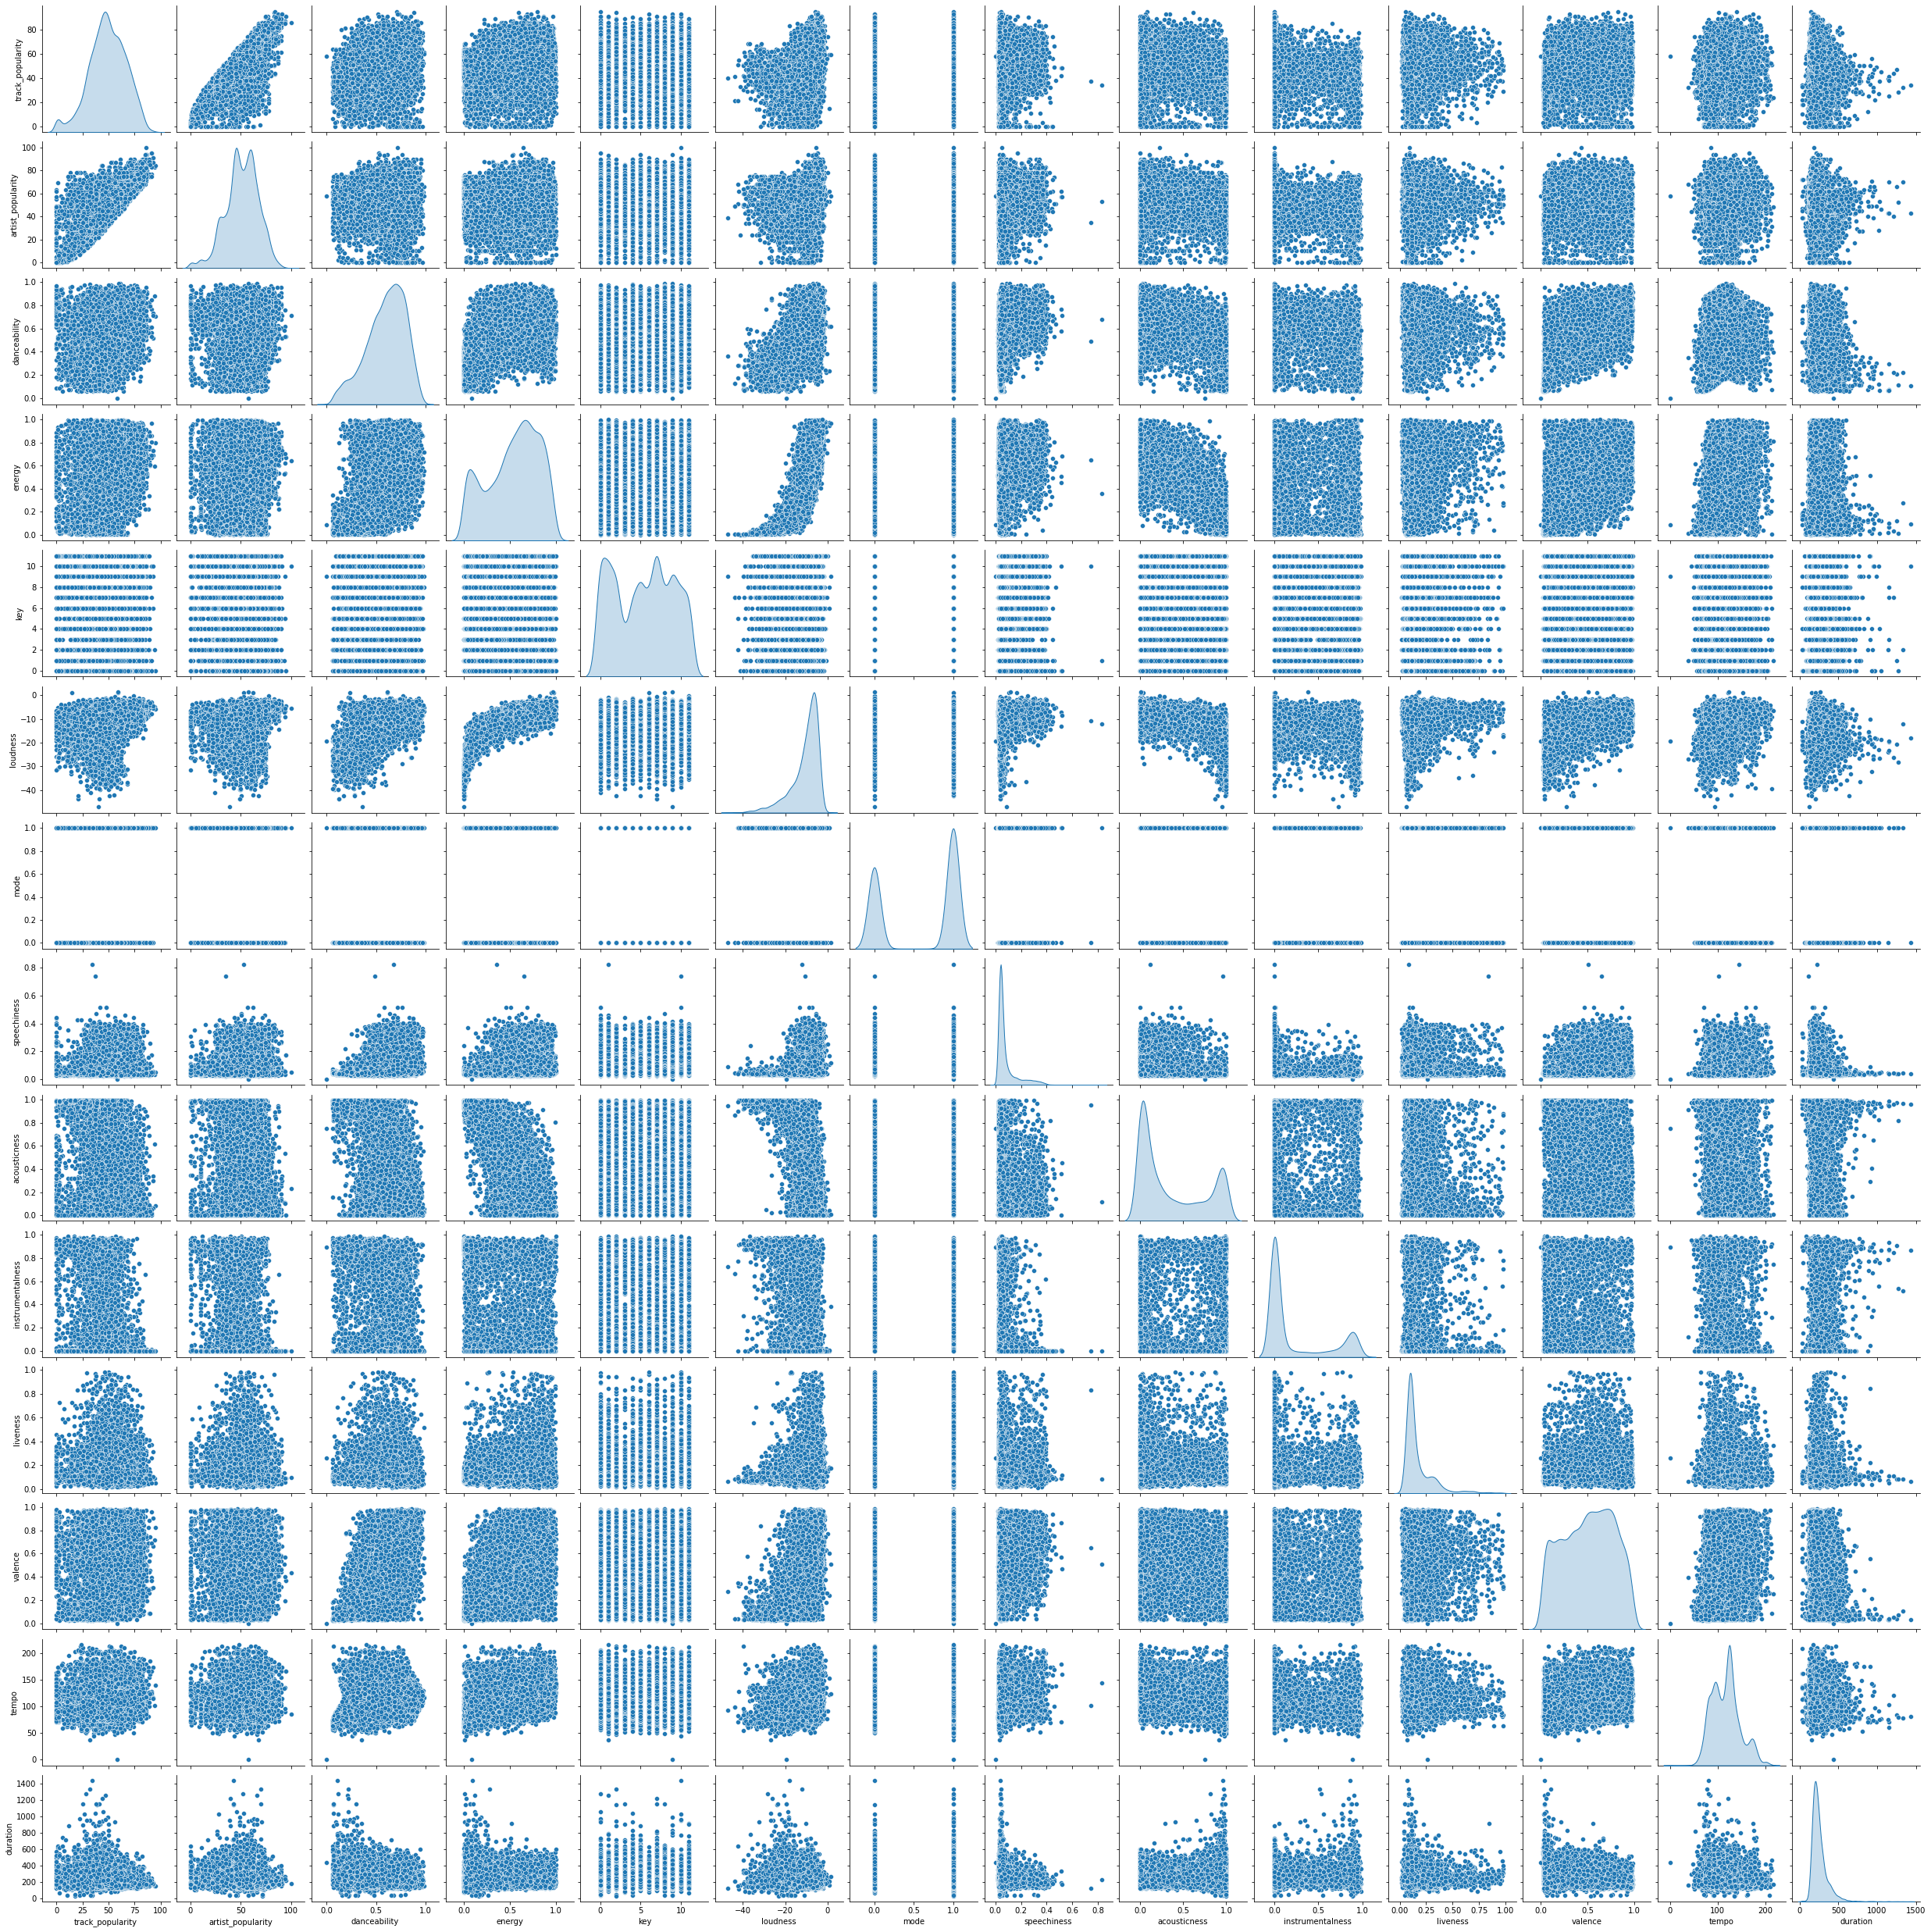

In [21]:
sns.pairplot(df[num_cols], kind= "scatter", diag_kind="kde")

In [22]:
df.genre.value_counts()

electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: genre, dtype: int64

In [23]:
plt.rcParams["figure.figsize"] = [8,5]

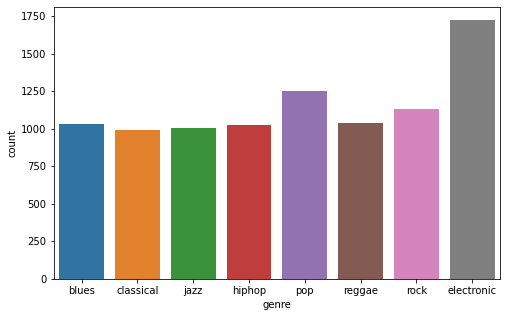

In [24]:
sns.countplot(data = df, x= df["genre"])
plt.show()

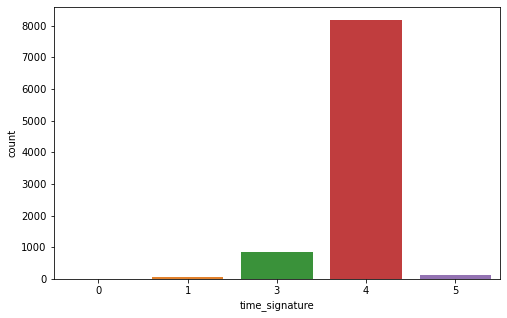

In [25]:
sns.countplot(data = df, x= df["time_signature"])
plt.show()

In [26]:
vcorr = df.corr()

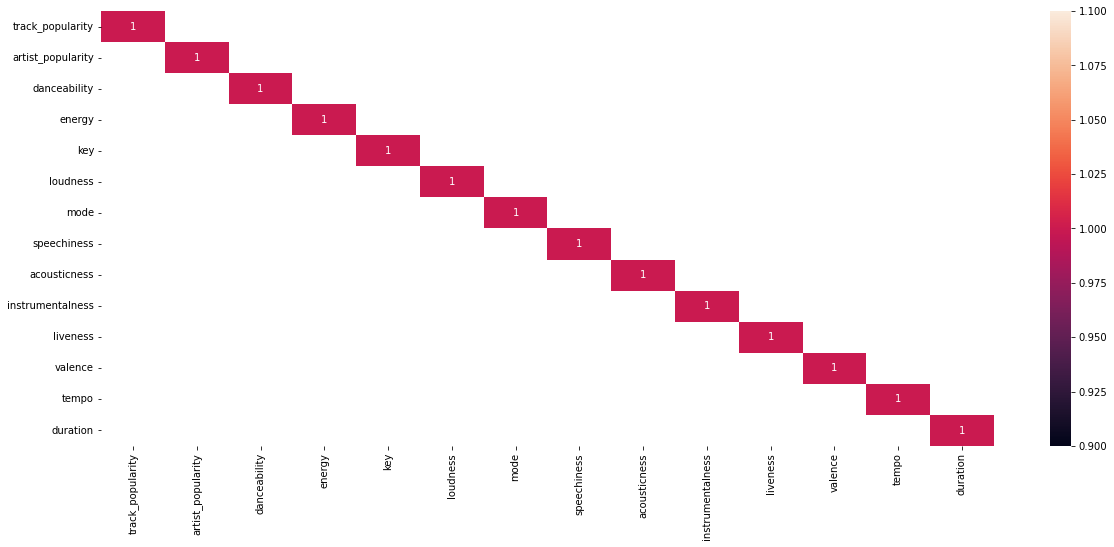

In [27]:
plt.figure(figsize = (20,8))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)], annot=True)
plt.show()

**No columns are correlated**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'track_popularity'),
  Text(1, 0, 'artist_popularity'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'key'),
  Text(5, 0, 'loudness'),
  Text(6, 0, 'mode'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'acousticness'),
  Text(9, 0, 'instrumentalness'),
  Text(10, 0, 'liveness'),
  Text(11, 0, 'valence'),
  Text(12, 0, 'tempo'),
  Text(13, 0, 'duration')])

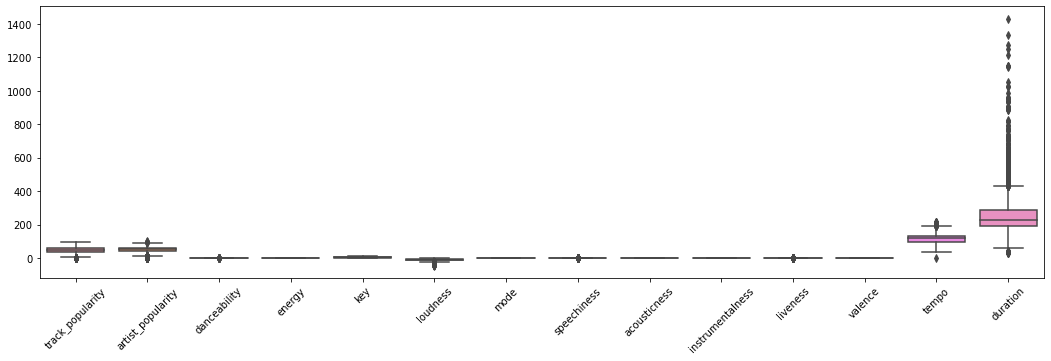

In [28]:
plt.figure(figsize = (18,5))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 45)

In [29]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    UL=data[variable].quantile(.75)+(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    return LL,UL

In [30]:
LL = df['duration'].quantile(.25)-(1.5*(df['duration'].quantile(.75)-df['duration'].quantile(.25)))
UL = df['duration'].quantile(.75)+(1.5*(df['duration'].quantile(.75)-df['duration'].quantile(.25)))
LL, UL

(46.0, 430.0)

In [31]:
a = df[df.duration > 430]
print(a.count())
a

playlist_url         513
playlist_name        513
track_name           513
track_popularity     513
artist_name          513
album                513
album_cover          513
artist_genres        513
artist_popularity    513
danceability         513
energy               513
key                  513
loudness             513
mode                 513
speechiness          513
acousticness         513
instrumentalness     513
liveness             513
valence              513
tempo                513
time_signature       513
genre                513
duration             513
dtype: int64


playlist_url        playlist_name  \
41    https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
127   https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
179   https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
181   https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
198   https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
...                                                 ...                  ...   
9177  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9182  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9183  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9189  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9191  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   

                                        track_name  track_popularity  \
41                              Bad News Is Coming                51   
127                        I Came Up The Heard Way                35   
179                               North West Blues                34   
181                                     Lonely Bed                46   
198                                Hellbound Train                52   
...                                            ...               ...   
9177                                   M07a - Edit                20   
9182        I Can't Kick This Feeling When It Hits                44   
9183                               Himmel & Hoelle                31   
9189                                       Sunrays                31   
9191  On The Uneven Surface of Mars - Original Mix                 0   

                 artist_name                                    album  \
41            Luther Allison                       Bad News Is Coming   
127          Eddy Clearwater  Blues Hang Out (1989) [Blues Reference]   
179                Dave Hole                              The Plumber   
181          Albert Cummings                         True To Yourself   
198              Savoy Brown                          Hellbound Train   
...                      ...                                      ...   
9177                Maurizio                                 M-Series   
9182               Moodymann                       Silentintroduction   
9183      Thomas P. Heckmann                    Electronic Body Music   
9189  The Other People Place            Lifestyles Of The Laptop Café   
9191             The Martian                                 Nascency   

                                            album_cover  \
41    https://i.scdn.co/image/ab67616d0000b2735d57a5...   
127   https://i.scdn.co/image/ab67616d0000b27334417c...   
179   https://i.scdn.co/image/ab67616d0000b27351c5b8...   
181   https://i.scdn.co/image/ab67616d0000b273d14c9f...   
198   https://i.scdn.co/image/ab67616d0000b27303691d...   
...                                                 ...   
9177  https://i.scdn.co/image/ab67616d0000b273c323d7...   
9182  https://i.scdn.co/image/ab67616d0000b27372d1e8...   
9183  https://i.scdn.co/image/ab67616d0000b273490d40...   
9189  https://i.scdn.co/image/ab67616d0000b27363403d...   
9191  https://i.scdn.co/image/ab67616d0000b27358eddf...   

                                          artist_genres  artist_popularity  \
41    ['acoustic blues', 'blues', 'blues rock', 'chi...                 41   
127   ['acoustic blues', 'blues', 'chicago blues', '...                 26   
179   ['acoustic blues', 'blues', 'blues rock', 'bri...                 27   
181   ['blues', 'blues rock', 'electric blues', 'mod...                 37   
198   ['blues', 'blues rock', 'british blues', 'clas...                 44   
...                                                 ...                ...   
9177  ['dub techno', 'microhouse', 'minimal techno',...                 22   
9182  [

In [32]:
num_cols_1 = ['track_popularity','artist_popularity','danceability','energy','key','loudness','mode','speechiness',
              'acousticness','instrumentalness','liveness','valence','tempo']

In [33]:
for col in num_cols_1:
    LL,UL=boundaries(df,col)
    
    df[col]=np.where(df[col]<LL,LL,
                         np.where(df[col]>UL,UL,df[col]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'track_popularity'),
  Text(1, 0, 'artist_popularity'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'key'),
  Text(5, 0, 'loudness'),
  Text(6, 0, 'mode'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'acousticness'),
  Text(9, 0, 'instrumentalness'),
  Text(10, 0, 'liveness'),
  Text(11, 0, 'valence'),
  Text(12, 0, 'tempo'),
  Text(13, 0, 'duration')])

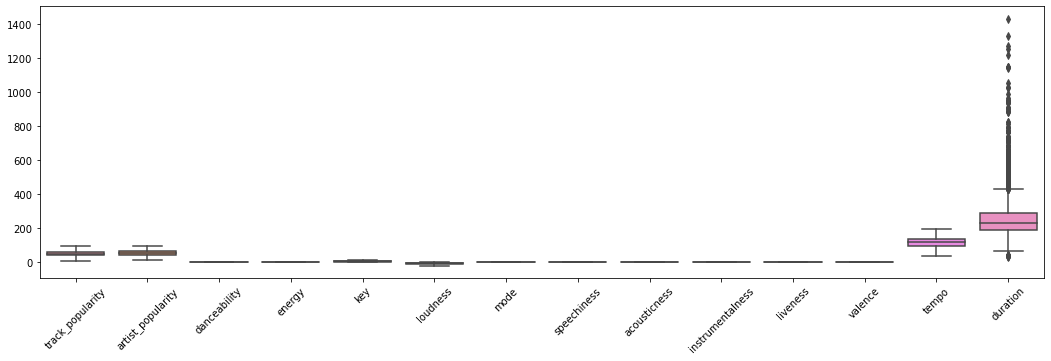

In [34]:
plt.figure(figsize = (18,5))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 45)

In [35]:
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [36]:
X = df.drop('genre', axis =1)
y = df['genre']

In [37]:
sc = StandardScaler()

In [38]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

playlist_url  playlist_name  track_name  track_popularity  artist_name  \
0       0.76122       0.095063    1.606330          0.118846     0.655659   
1       0.76122       0.095063   -0.028810         -0.628781    -1.085796   
2       0.76122       0.095063    0.768839          0.003826    -0.060234   
3       0.76122       0.095063   -0.551226          0.578924     1.119293   
4       0.76122       0.095063    1.084321          0.118846    -0.202021   

      album  album_cover  artist_genres  artist_popularity  danceability  ...  \
0  0.130971     1.706370      -0.159046          -0.652925      0.195062  ...   
1 -0.065527    -1.549718      -0.137493          -1.161057      0.687606  ...   
2 -1.218901     0.363742      -0.162279          -0.652925      0.568359  ...   
3  0.119330     0.722770      -1.621410          -0.335343      0.775746  ...   
4  0.647359     0.388580      -0.161201          -0.589409      0.786115  ...   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0 -0.094099  0.822576    -0.589020      0.351820         -0.647128  0.509044   
1 -2.121860 -1.215693    -0.712820      1.485017         -0.511489 -0.376374   
2 -0.313893  0.822576    -0.354685     -0.575342         -0.572778  0.487963   
3  0.138972 -1.215693    -0.602284      0.636475         -0.587601  2.151810   
4 -0.702812  0.822576    -0.418795      0.815400         -0.648320 -0.355292   

    valence     tempo  time_signature  duration  
0  1.271062 -0.453335        0.269915 -1.032487  
1 -0.293288 -1.326574        0.269915  0.830853  
2  0.789723  0.219406        0.269915 -0.699048  
3  1.007830 -0.078789        0.269915 -0.640205  
4  0.236937 -0.178314        0.269915 -1.081523  

[5 rows x 22 columns]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(df_X_scaled,y,test_size=0.20,random_state=1234)

In [40]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)*100
nb_accuracy

87.28260869565217

**For model building part we're not doing any feature alteration as we're getting better model**

## KNN Classifier

In [41]:
k_values = range(3, 23)
list(k_values)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [42]:
test_accuracy={}

In [43]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  test_accuracy[k] = accuracy_score(y_test, knn_pred)

In [44]:
test_accuracy

{3: 0.7554347826086957,
 4: 0.7690217391304348,
 5: 0.779891304347826,
 6: 0.7831521739130435,
 7: 0.7913043478260869,
 8: 0.7934782608695652,
 9: 0.7918478260869565,
 10: 0.7956521739130434,
 11: 0.7989130434782609,
 12: 0.8043478260869565,
 13: 0.7934782608695652,
 14: 0.7961956521739131,
 15: 0.7961956521739131,
 16: 0.7961956521739131,
 17: 0.7929347826086957,
 18: 0.7967391304347826,
 19: 0.7967391304347826,
 20: 0.7978260869565217,
 21: 0.7994565217391304,
 22: 0.8010869565217391}

**We can observe that n = 12 gives best accuracy, therefore we'll build model with 12 n values**

## SVM

In [45]:
parameters = ('linear', 'rbf','poly', 'sigmoid')

In [46]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [47]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

92.33695652173914

In [48]:
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [49]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

88.09782608695652

In [50]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [51]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

84.1304347826087

In [52]:
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [53]:
svm_accuracy = accuracy_score(y_test, svm_pred)*100
svm_accuracy

77.11956521739131

**Linear kernel gives better accuracy**

In [54]:
models = [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors = 12),SVC(kernel = 'linear'),GradientBoostingClassifier(),
          RandomForestClassifier(),XGBClassifier(), GaussianNB(),CatBoostClassifier(),LGBMClassifier()]

In [55]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    
    print('Accuracy score: ',accuracy_score(y_train,y_pred_train))
    print('Accuracy score: ',accuracy_score(y_test,y_pred_test))      

DecisionTreeClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.9815217391304348
KNeighborsClassifier(n_neighbors=12): 
Accuracy score:  0.8314759445501495
Accuracy score:  0.8043478260869565
SVC(kernel='linear'): 
Accuracy score:  0.9357162272356618
Accuracy score:  0.9233695652173913
GradientBoostingClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.9994565217391305
RandomForestClassifier(): 
Accuracy score:  1.0
Accuracy score:  0.9972826086956522
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_

136:	learn: 0.0178225	total: 3.41s	remaining: 21.5s
137:	learn: 0.0176742	total: 3.44s	remaining: 21.5s
138:	learn: 0.0174801	total: 3.46s	remaining: 21.4s
139:	learn: 0.0173483	total: 3.48s	remaining: 21.4s
140:	learn: 0.0172707	total: 3.51s	remaining: 21.4s
141:	learn: 0.0171656	total: 3.53s	remaining: 21.3s
142:	learn: 0.0170060	total: 3.55s	remaining: 21.3s
143:	learn: 0.0169701	total: 3.58s	remaining: 21.3s
144:	learn: 0.0168685	total: 3.6s	remaining: 21.2s
145:	learn: 0.0167962	total: 3.62s	remaining: 21.2s
146:	learn: 0.0167036	total: 3.64s	remaining: 21.1s
147:	learn: 0.0164674	total: 3.67s	remaining: 21.1s
148:	learn: 0.0159012	total: 3.69s	remaining: 21.1s
149:	learn: 0.0158746	total: 3.71s	remaining: 21s
150:	learn: 0.0157909	total: 3.73s	remaining: 21s
151:	learn: 0.0157227	total: 3.76s	remaining: 21s
152:	learn: 0.0156494	total: 3.78s	remaining: 20.9s
153:	learn: 0.0155134	total: 3.8s	remaining: 20.9s
154:	learn: 0.0154512	total: 3.83s	remaining: 20.9s
155:	learn: 0.015405

296:	learn: 0.0063581	total: 7.07s	remaining: 16.7s
297:	learn: 0.0063446	total: 7.08s	remaining: 16.7s
298:	learn: 0.0063293	total: 7.11s	remaining: 16.7s
299:	learn: 0.0063160	total: 7.13s	remaining: 16.6s
300:	learn: 0.0062919	total: 7.15s	remaining: 16.6s
301:	learn: 0.0062767	total: 7.17s	remaining: 16.6s
302:	learn: 0.0062205	total: 7.19s	remaining: 16.5s
303:	learn: 0.0062084	total: 7.21s	remaining: 16.5s
304:	learn: 0.0060716	total: 7.24s	remaining: 16.5s
305:	learn: 0.0060501	total: 7.26s	remaining: 16.5s
306:	learn: 0.0060282	total: 7.28s	remaining: 16.4s
307:	learn: 0.0060163	total: 7.3s	remaining: 16.4s
308:	learn: 0.0059995	total: 7.32s	remaining: 16.4s
309:	learn: 0.0059871	total: 7.34s	remaining: 16.3s
310:	learn: 0.0059839	total: 7.36s	remaining: 16.3s
311:	learn: 0.0059488	total: 7.38s	remaining: 16.3s
312:	learn: 0.0059203	total: 7.4s	remaining: 16.2s
313:	learn: 0.0058211	total: 7.43s	remaining: 16.2s
314:	learn: 0.0057878	total: 7.46s	remaining: 16.2s
315:	learn: 0.

456:	learn: 0.0034492	total: 10.6s	remaining: 12.6s
457:	learn: 0.0034461	total: 10.6s	remaining: 12.6s
458:	learn: 0.0034393	total: 10.7s	remaining: 12.6s
459:	learn: 0.0034333	total: 10.7s	remaining: 12.5s
460:	learn: 0.0034272	total: 10.7s	remaining: 12.5s
461:	learn: 0.0034238	total: 10.7s	remaining: 12.5s
462:	learn: 0.0034001	total: 10.7s	remaining: 12.5s
463:	learn: 0.0033991	total: 10.8s	remaining: 12.4s
464:	learn: 0.0033924	total: 10.8s	remaining: 12.4s
465:	learn: 0.0033865	total: 10.8s	remaining: 12.4s
466:	learn: 0.0033771	total: 10.8s	remaining: 12.4s
467:	learn: 0.0033650	total: 10.9s	remaining: 12.4s
468:	learn: 0.0033602	total: 10.9s	remaining: 12.3s
469:	learn: 0.0033564	total: 10.9s	remaining: 12.3s
470:	learn: 0.0033545	total: 11s	remaining: 12.3s
471:	learn: 0.0033518	total: 11s	remaining: 12.3s
472:	learn: 0.0033475	total: 11s	remaining: 12.3s
473:	learn: 0.0033459	total: 11s	remaining: 12.3s
474:	learn: 0.0033334	total: 11.1s	remaining: 12.2s
475:	learn: 0.003317

616:	learn: 0.0022850	total: 14.5s	remaining: 8.99s
617:	learn: 0.0022802	total: 14.5s	remaining: 8.97s
618:	learn: 0.0022787	total: 14.5s	remaining: 8.95s
619:	learn: 0.0022756	total: 14.6s	remaining: 8.93s
620:	learn: 0.0022728	total: 14.6s	remaining: 8.9s
621:	learn: 0.0022572	total: 14.6s	remaining: 8.88s
622:	learn: 0.0022538	total: 14.6s	remaining: 8.86s
623:	learn: 0.0022499	total: 14.7s	remaining: 8.84s
624:	learn: 0.0022465	total: 14.7s	remaining: 8.82s
625:	learn: 0.0022390	total: 14.7s	remaining: 8.79s
626:	learn: 0.0022339	total: 14.7s	remaining: 8.77s
627:	learn: 0.0022267	total: 14.8s	remaining: 8.75s
628:	learn: 0.0022192	total: 14.8s	remaining: 8.73s
629:	learn: 0.0022109	total: 14.8s	remaining: 8.7s
630:	learn: 0.0021976	total: 14.8s	remaining: 8.68s
631:	learn: 0.0021943	total: 14.9s	remaining: 8.65s
632:	learn: 0.0021930	total: 14.9s	remaining: 8.63s
633:	learn: 0.0021868	total: 14.9s	remaining: 8.61s
634:	learn: 0.0021853	total: 14.9s	remaining: 8.59s
635:	learn: 0.

777:	learn: 0.0016717	total: 18.4s	remaining: 5.24s
778:	learn: 0.0016695	total: 18.4s	remaining: 5.22s
779:	learn: 0.0016683	total: 18.4s	remaining: 5.19s
780:	learn: 0.0016675	total: 18.4s	remaining: 5.17s
781:	learn: 0.0016667	total: 18.5s	remaining: 5.14s
782:	learn: 0.0016618	total: 18.5s	remaining: 5.12s
783:	learn: 0.0016604	total: 18.5s	remaining: 5.09s
784:	learn: 0.0016594	total: 18.5s	remaining: 5.07s
785:	learn: 0.0016574	total: 18.5s	remaining: 5.05s
786:	learn: 0.0016539	total: 18.6s	remaining: 5.02s
787:	learn: 0.0016522	total: 18.6s	remaining: 5s
788:	learn: 0.0016513	total: 18.6s	remaining: 4.97s
789:	learn: 0.0016509	total: 18.6s	remaining: 4.95s
790:	learn: 0.0016499	total: 18.6s	remaining: 4.92s
791:	learn: 0.0016478	total: 18.7s	remaining: 4.9s
792:	learn: 0.0016442	total: 18.7s	remaining: 4.88s
793:	learn: 0.0016422	total: 18.7s	remaining: 4.86s
794:	learn: 0.0016377	total: 18.7s	remaining: 4.83s
795:	learn: 0.0016326	total: 18.8s	remaining: 4.81s
796:	learn: 0.00

943:	learn: 0.0013495	total: 21.9s	remaining: 1.3s
944:	learn: 0.0013482	total: 21.9s	remaining: 1.28s
945:	learn: 0.0013476	total: 22s	remaining: 1.25s
946:	learn: 0.0013465	total: 22s	remaining: 1.23s
947:	learn: 0.0013439	total: 22s	remaining: 1.21s
948:	learn: 0.0013433	total: 22s	remaining: 1.18s
949:	learn: 0.0013427	total: 22.1s	remaining: 1.16s
950:	learn: 0.0013412	total: 22.1s	remaining: 1.14s
951:	learn: 0.0013396	total: 22.1s	remaining: 1.11s
952:	learn: 0.0013390	total: 22.1s	remaining: 1.09s
953:	learn: 0.0013384	total: 22.1s	remaining: 1.07s
954:	learn: 0.0013380	total: 22.2s	remaining: 1.04s
955:	learn: 0.0013361	total: 22.2s	remaining: 1.02s
956:	learn: 0.0013353	total: 22.2s	remaining: 998ms
957:	learn: 0.0013318	total: 22.2s	remaining: 974ms
958:	learn: 0.0013308	total: 22.2s	remaining: 951ms
959:	learn: 0.0013301	total: 22.3s	remaining: 928ms
960:	learn: 0.0013294	total: 22.3s	remaining: 905ms
961:	learn: 0.0013279	total: 22.3s	remaining: 881ms
962:	learn: 0.0013255

In [56]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('confusion_matrix: ', confusion_matrix(y_train,y_pred_train))
    print('confusion_matrix: ', confusion_matrix(y_test,y_pred_test))   

DecisionTreeClassifier(): 
confusion_matrix:  [[ 835    0    0    0    0    0    0    0]
 [   0  789    0    0    0    0    0    0]
 [   0    0 1376    0    0    0    0    0]
 [   0    0    0  825    0    0    0    0]
 [   0    0    0    0  802    0    0    0]
 [   0    0    0    0    0 1008    0    0]
 [   0    0    0    0    0    0  812    0]
 [   0    0    0    0    0    0    0  911]]
confusion_matrix:  [[198   1   0   0   0   0   0   0]
 [  5 186   0   0  10   0   0   0]
 [  0   0 349   0   0   0   0   0]
 [  0   0   0 199   0   0   0   0]
 [  1  11   0   0 187   0   1   0]
 [  0   0   0   0   0 243   0   0]
 [  0   0   0   0   3   0 223   0]
 [  0   0   0   0   0   0   0 223]]
KNeighborsClassifier(n_neighbors=12): 
confusion_matrix:  [[ 711    4   27    5   50    7    9   22]
 [  13  706    1    0   68    0    1    0]
 [  12   10 1184   53   27   56    2   32]
 [   3    1   50  635    1  106   11   18]
 [  37   72   38    3  645    3    2    2]
 [   0    0   71   78    2  797    1

53:	learn: 0.0610402	total: 1.19s	remaining: 20.9s
54:	learn: 0.0601088	total: 1.22s	remaining: 20.9s
55:	learn: 0.0581611	total: 1.24s	remaining: 20.8s
56:	learn: 0.0561692	total: 1.26s	remaining: 20.8s
57:	learn: 0.0546611	total: 1.28s	remaining: 20.7s
58:	learn: 0.0530239	total: 1.3s	remaining: 20.7s
59:	learn: 0.0518796	total: 1.32s	remaining: 20.6s
60:	learn: 0.0507915	total: 1.34s	remaining: 20.6s
61:	learn: 0.0497907	total: 1.36s	remaining: 20.6s
62:	learn: 0.0489483	total: 1.38s	remaining: 20.5s
63:	learn: 0.0471281	total: 1.4s	remaining: 20.5s
64:	learn: 0.0463428	total: 1.43s	remaining: 20.5s
65:	learn: 0.0453306	total: 1.45s	remaining: 20.5s
66:	learn: 0.0445269	total: 1.47s	remaining: 20.4s
67:	learn: 0.0441061	total: 1.49s	remaining: 20.4s
68:	learn: 0.0436633	total: 1.51s	remaining: 20.3s
69:	learn: 0.0424256	total: 1.53s	remaining: 20.3s
70:	learn: 0.0418855	total: 1.55s	remaining: 20.3s
71:	learn: 0.0414675	total: 1.57s	remaining: 20.2s
72:	learn: 0.0409441	total: 1.59s

214:	learn: 0.0096069	total: 4.56s	remaining: 16.6s
215:	learn: 0.0095545	total: 4.58s	remaining: 16.6s
216:	learn: 0.0094988	total: 4.6s	remaining: 16.6s
217:	learn: 0.0093826	total: 4.62s	remaining: 16.6s
218:	learn: 0.0093658	total: 4.64s	remaining: 16.5s
219:	learn: 0.0092863	total: 4.66s	remaining: 16.5s
220:	learn: 0.0092783	total: 4.68s	remaining: 16.5s
221:	learn: 0.0091872	total: 4.7s	remaining: 16.5s
222:	learn: 0.0091521	total: 4.72s	remaining: 16.4s
223:	learn: 0.0091293	total: 4.74s	remaining: 16.4s
224:	learn: 0.0090898	total: 4.76s	remaining: 16.4s
225:	learn: 0.0090221	total: 4.79s	remaining: 16.4s
226:	learn: 0.0089542	total: 4.81s	remaining: 16.4s
227:	learn: 0.0089183	total: 4.83s	remaining: 16.3s
228:	learn: 0.0088939	total: 4.85s	remaining: 16.3s
229:	learn: 0.0088592	total: 4.87s	remaining: 16.3s
230:	learn: 0.0087799	total: 4.89s	remaining: 16.3s
231:	learn: 0.0085544	total: 4.91s	remaining: 16.2s
232:	learn: 0.0085266	total: 4.93s	remaining: 16.2s
233:	learn: 0.

374:	learn: 0.0044728	total: 8.2s	remaining: 13.7s
375:	learn: 0.0044634	total: 8.23s	remaining: 13.7s
376:	learn: 0.0044546	total: 8.26s	remaining: 13.7s
377:	learn: 0.0044445	total: 8.29s	remaining: 13.6s
378:	learn: 0.0044298	total: 8.31s	remaining: 13.6s
379:	learn: 0.0044175	total: 8.34s	remaining: 13.6s
380:	learn: 0.0044084	total: 8.37s	remaining: 13.6s
381:	learn: 0.0043434	total: 8.39s	remaining: 13.6s
382:	learn: 0.0043183	total: 8.42s	remaining: 13.6s
383:	learn: 0.0043112	total: 8.45s	remaining: 13.6s
384:	learn: 0.0042988	total: 8.48s	remaining: 13.5s
385:	learn: 0.0042816	total: 8.5s	remaining: 13.5s
386:	learn: 0.0042733	total: 8.53s	remaining: 13.5s
387:	learn: 0.0042642	total: 8.55s	remaining: 13.5s
388:	learn: 0.0042573	total: 8.58s	remaining: 13.5s
389:	learn: 0.0042505	total: 8.61s	remaining: 13.5s
390:	learn: 0.0042262	total: 8.64s	remaining: 13.5s
391:	learn: 0.0041960	total: 8.66s	remaining: 13.4s
392:	learn: 0.0041917	total: 8.69s	remaining: 13.4s
393:	learn: 0.

534:	learn: 0.0027857	total: 11.9s	remaining: 10.3s
535:	learn: 0.0027763	total: 11.9s	remaining: 10.3s
536:	learn: 0.0027597	total: 11.9s	remaining: 10.3s
537:	learn: 0.0027567	total: 11.9s	remaining: 10.3s
538:	learn: 0.0027542	total: 12s	remaining: 10.2s
539:	learn: 0.0027498	total: 12s	remaining: 10.2s
540:	learn: 0.0027458	total: 12s	remaining: 10.2s
541:	learn: 0.0027434	total: 12s	remaining: 10.2s
542:	learn: 0.0027410	total: 12s	remaining: 10.1s
543:	learn: 0.0027394	total: 12.1s	remaining: 10.1s
544:	learn: 0.0027379	total: 12.1s	remaining: 10.1s
545:	learn: 0.0027356	total: 12.1s	remaining: 10.1s
546:	learn: 0.0027234	total: 12.1s	remaining: 10.1s
547:	learn: 0.0027194	total: 12.2s	remaining: 10s
548:	learn: 0.0027125	total: 12.2s	remaining: 10s
549:	learn: 0.0027116	total: 12.2s	remaining: 9.99s
550:	learn: 0.0026970	total: 12.2s	remaining: 9.97s
551:	learn: 0.0026884	total: 12.3s	remaining: 9.95s
552:	learn: 0.0026857	total: 12.3s	remaining: 9.92s
553:	learn: 0.0026802	tota

697:	learn: 0.0019588	total: 15.6s	remaining: 6.74s
698:	learn: 0.0019576	total: 15.6s	remaining: 6.71s
699:	learn: 0.0019571	total: 15.6s	remaining: 6.69s
700:	learn: 0.0019559	total: 15.6s	remaining: 6.67s
701:	learn: 0.0019541	total: 15.7s	remaining: 6.65s
702:	learn: 0.0019527	total: 15.7s	remaining: 6.62s
703:	learn: 0.0019513	total: 15.7s	remaining: 6.6s
704:	learn: 0.0019444	total: 15.7s	remaining: 6.58s
705:	learn: 0.0019423	total: 15.7s	remaining: 6.56s
706:	learn: 0.0019404	total: 15.8s	remaining: 6.54s
707:	learn: 0.0019189	total: 15.8s	remaining: 6.51s
708:	learn: 0.0019171	total: 15.8s	remaining: 6.49s
709:	learn: 0.0019147	total: 15.8s	remaining: 6.47s
710:	learn: 0.0019103	total: 15.9s	remaining: 6.45s
711:	learn: 0.0019071	total: 15.9s	remaining: 6.42s
712:	learn: 0.0019048	total: 15.9s	remaining: 6.4s
713:	learn: 0.0019035	total: 15.9s	remaining: 6.38s
714:	learn: 0.0018990	total: 15.9s	remaining: 6.36s
715:	learn: 0.0018969	total: 16s	remaining: 6.34s
716:	learn: 0.00

857:	learn: 0.0015004	total: 19.2s	remaining: 3.17s
858:	learn: 0.0014986	total: 19.2s	remaining: 3.15s
859:	learn: 0.0014961	total: 19.2s	remaining: 3.13s
860:	learn: 0.0014940	total: 19.2s	remaining: 3.1s
861:	learn: 0.0014925	total: 19.3s	remaining: 3.08s
862:	learn: 0.0014919	total: 19.3s	remaining: 3.06s
863:	learn: 0.0014910	total: 19.3s	remaining: 3.04s
864:	learn: 0.0014893	total: 19.3s	remaining: 3.02s
865:	learn: 0.0014876	total: 19.4s	remaining: 2.99s
866:	learn: 0.0014866	total: 19.4s	remaining: 2.97s
867:	learn: 0.0014852	total: 19.4s	remaining: 2.95s
868:	learn: 0.0014844	total: 19.4s	remaining: 2.93s
869:	learn: 0.0014833	total: 19.4s	remaining: 2.9s
870:	learn: 0.0014828	total: 19.5s	remaining: 2.88s
871:	learn: 0.0014807	total: 19.5s	remaining: 2.86s
872:	learn: 0.0014802	total: 19.5s	remaining: 2.84s
873:	learn: 0.0014797	total: 19.5s	remaining: 2.82s
874:	learn: 0.0014782	total: 19.6s	remaining: 2.79s
875:	learn: 0.0014775	total: 19.6s	remaining: 2.77s
876:	learn: 0.

In [57]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('classification_report: ',classification_report(y_train,y_pred_train))
    print('classification_report: ',classification_report(y_test,y_pred_test))   

DecisionTreeClassifier(): 
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       789
           2       1.00      1.00      1.00      1376
           3       1.00      1.00      1.00       825
           4       1.00      1.00      1.00       802
           5       1.00      1.00      1.00      1008
           6       1.00      1.00      1.00       812
           7       1.00      1.00      1.00       911

    accuracy                           1.00      7358
   macro avg       1.00      1.00      1.00      7358
weighted avg       1.00      1.00      1.00      7358

classification_report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.95      0.93      0.94       201
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       199
   

3:	learn: 1.0724573	total: 96.5ms	remaining: 24s
4:	learn: 0.9631551	total: 119ms	remaining: 23.7s
5:	learn: 0.8568274	total: 139ms	remaining: 23s
6:	learn: 0.7616742	total: 159ms	remaining: 22.5s
7:	learn: 0.6855733	total: 179ms	remaining: 22.3s
8:	learn: 0.6290443	total: 201ms	remaining: 22.1s
9:	learn: 0.5785786	total: 222ms	remaining: 22s
10:	learn: 0.5265238	total: 244ms	remaining: 22s
11:	learn: 0.4824419	total: 266ms	remaining: 21.9s
12:	learn: 0.4447042	total: 286ms	remaining: 21.7s
13:	learn: 0.4113761	total: 307ms	remaining: 21.6s
14:	learn: 0.3830263	total: 328ms	remaining: 21.6s
15:	learn: 0.3528830	total: 349ms	remaining: 21.5s
16:	learn: 0.3266596	total: 370ms	remaining: 21.4s
17:	learn: 0.3051379	total: 389ms	remaining: 21.2s
18:	learn: 0.2854195	total: 413ms	remaining: 21.3s
19:	learn: 0.2667260	total: 432ms	remaining: 21.2s
20:	learn: 0.2487426	total: 453ms	remaining: 21.1s
21:	learn: 0.2317475	total: 484ms	remaining: 21.5s
22:	learn: 0.2189843	total: 516ms	remaining: 

171:	learn: 0.0131025	total: 4.36s	remaining: 21s
172:	learn: 0.0129864	total: 4.38s	remaining: 21s
173:	learn: 0.0129622	total: 4.4s	remaining: 20.9s
174:	learn: 0.0128729	total: 4.43s	remaining: 20.9s
175:	learn: 0.0126834	total: 4.45s	remaining: 20.9s
176:	learn: 0.0125926	total: 4.47s	remaining: 20.8s
177:	learn: 0.0125039	total: 4.5s	remaining: 20.8s
178:	learn: 0.0124363	total: 4.52s	remaining: 20.7s
179:	learn: 0.0123710	total: 4.54s	remaining: 20.7s
180:	learn: 0.0123368	total: 4.57s	remaining: 20.7s
181:	learn: 0.0122849	total: 4.59s	remaining: 20.6s
182:	learn: 0.0122138	total: 4.61s	remaining: 20.6s
183:	learn: 0.0121656	total: 4.63s	remaining: 20.5s
184:	learn: 0.0121215	total: 4.66s	remaining: 20.5s
185:	learn: 0.0120175	total: 4.68s	remaining: 20.5s
186:	learn: 0.0117175	total: 4.71s	remaining: 20.5s
187:	learn: 0.0116548	total: 4.73s	remaining: 20.4s
188:	learn: 0.0116121	total: 4.75s	remaining: 20.4s
189:	learn: 0.0115854	total: 4.78s	remaining: 20.4s
190:	learn: 0.0114

338:	learn: 0.0052077	total: 8.91s	remaining: 17.4s
339:	learn: 0.0051970	total: 8.94s	remaining: 17.4s
340:	learn: 0.0051751	total: 8.96s	remaining: 17.3s
341:	learn: 0.0051626	total: 8.99s	remaining: 17.3s
342:	learn: 0.0051242	total: 9.01s	remaining: 17.3s
343:	learn: 0.0051095	total: 9.04s	remaining: 17.2s
344:	learn: 0.0050933	total: 9.06s	remaining: 17.2s
345:	learn: 0.0050655	total: 9.09s	remaining: 17.2s
346:	learn: 0.0050480	total: 9.11s	remaining: 17.1s
347:	learn: 0.0050189	total: 9.14s	remaining: 17.1s
348:	learn: 0.0049978	total: 9.16s	remaining: 17.1s
349:	learn: 0.0049569	total: 9.19s	remaining: 17.1s
350:	learn: 0.0049395	total: 9.22s	remaining: 17s
351:	learn: 0.0049266	total: 9.24s	remaining: 17s
352:	learn: 0.0049205	total: 9.26s	remaining: 17s
353:	learn: 0.0048268	total: 9.29s	remaining: 16.9s
354:	learn: 0.0048150	total: 9.31s	remaining: 16.9s
355:	learn: 0.0048058	total: 9.33s	remaining: 16.9s
356:	learn: 0.0048024	total: 9.36s	remaining: 16.9s
357:	learn: 0.0047

499:	learn: 0.0030354	total: 13.3s	remaining: 13.3s
500:	learn: 0.0030197	total: 13.3s	remaining: 13.3s
501:	learn: 0.0030161	total: 13.3s	remaining: 13.2s
502:	learn: 0.0030089	total: 13.4s	remaining: 13.2s
503:	learn: 0.0030077	total: 13.4s	remaining: 13.2s
504:	learn: 0.0029981	total: 13.4s	remaining: 13.1s
505:	learn: 0.0029953	total: 13.4s	remaining: 13.1s
506:	learn: 0.0029838	total: 13.5s	remaining: 13.1s
507:	learn: 0.0029811	total: 13.5s	remaining: 13.1s
508:	learn: 0.0029692	total: 13.5s	remaining: 13s
509:	learn: 0.0029641	total: 13.5s	remaining: 13s
510:	learn: 0.0029593	total: 13.5s	remaining: 13s
511:	learn: 0.0029562	total: 13.6s	remaining: 12.9s
512:	learn: 0.0029470	total: 13.6s	remaining: 12.9s
513:	learn: 0.0029107	total: 13.6s	remaining: 12.9s
514:	learn: 0.0029039	total: 13.6s	remaining: 12.8s
515:	learn: 0.0028998	total: 13.7s	remaining: 12.8s
516:	learn: 0.0028977	total: 13.7s	remaining: 12.8s
517:	learn: 0.0028940	total: 13.7s	remaining: 12.8s
518:	learn: 0.0028

658:	learn: 0.0020799	total: 17.9s	remaining: 9.29s
659:	learn: 0.0020782	total: 18s	remaining: 9.26s
660:	learn: 0.0020749	total: 18s	remaining: 9.23s
661:	learn: 0.0020740	total: 18s	remaining: 9.21s
662:	learn: 0.0020721	total: 18.1s	remaining: 9.19s
663:	learn: 0.0020700	total: 18.1s	remaining: 9.16s
664:	learn: 0.0020644	total: 18.1s	remaining: 9.14s
665:	learn: 0.0020580	total: 18.2s	remaining: 9.11s
666:	learn: 0.0020560	total: 18.2s	remaining: 9.08s
667:	learn: 0.0020547	total: 18.2s	remaining: 9.05s
668:	learn: 0.0020470	total: 18.3s	remaining: 9.03s
669:	learn: 0.0020463	total: 18.3s	remaining: 9s
670:	learn: 0.0020439	total: 18.3s	remaining: 8.97s
671:	learn: 0.0020429	total: 18.3s	remaining: 8.95s
672:	learn: 0.0020406	total: 18.4s	remaining: 8.92s
673:	learn: 0.0020393	total: 18.4s	remaining: 8.9s
674:	learn: 0.0020369	total: 18.4s	remaining: 8.87s
675:	learn: 0.0020321	total: 18.5s	remaining: 8.84s
676:	learn: 0.0020281	total: 18.5s	remaining: 8.82s
677:	learn: 0.0020260	

824:	learn: 0.0015864	total: 22.5s	remaining: 4.77s
825:	learn: 0.0015847	total: 22.5s	remaining: 4.75s
826:	learn: 0.0015825	total: 22.6s	remaining: 4.72s
827:	learn: 0.0015815	total: 22.6s	remaining: 4.69s
828:	learn: 0.0015797	total: 22.6s	remaining: 4.66s
829:	learn: 0.0015792	total: 22.6s	remaining: 4.64s
830:	learn: 0.0015771	total: 22.7s	remaining: 4.61s
831:	learn: 0.0015748	total: 22.7s	remaining: 4.58s
832:	learn: 0.0015741	total: 22.7s	remaining: 4.55s
833:	learn: 0.0015722	total: 22.7s	remaining: 4.53s
834:	learn: 0.0015706	total: 22.8s	remaining: 4.5s
835:	learn: 0.0015656	total: 22.8s	remaining: 4.47s
836:	learn: 0.0015646	total: 22.8s	remaining: 4.44s
837:	learn: 0.0015634	total: 22.8s	remaining: 4.41s
838:	learn: 0.0015628	total: 22.9s	remaining: 4.39s
839:	learn: 0.0015614	total: 22.9s	remaining: 4.36s
840:	learn: 0.0015610	total: 22.9s	remaining: 4.33s
841:	learn: 0.0015595	total: 22.9s	remaining: 4.3s
842:	learn: 0.0015581	total: 23s	remaining: 4.28s
843:	learn: 0.00

985:	learn: 0.0012893	total: 26.3s	remaining: 374ms
986:	learn: 0.0012851	total: 26.4s	remaining: 347ms
987:	learn: 0.0012807	total: 26.4s	remaining: 320ms
988:	learn: 0.0012710	total: 26.4s	remaining: 294ms
989:	learn: 0.0012705	total: 26.4s	remaining: 267ms
990:	learn: 0.0012694	total: 26.4s	remaining: 240ms
991:	learn: 0.0012685	total: 26.5s	remaining: 213ms
992:	learn: 0.0012676	total: 26.5s	remaining: 187ms
993:	learn: 0.0012675	total: 26.5s	remaining: 160ms
994:	learn: 0.0012659	total: 26.5s	remaining: 133ms
995:	learn: 0.0012652	total: 26.6s	remaining: 107ms
996:	learn: 0.0012640	total: 26.6s	remaining: 80ms
997:	learn: 0.0012631	total: 26.6s	remaining: 53.3ms
998:	learn: 0.0012629	total: 26.6s	remaining: 26.7ms
999:	learn: 0.0012618	total: 26.7s	remaining: 0us
<catboost.core.CatBoostClassifier object at 0x000001D9171BF760>: 
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.0

DecisionTreeClassifier(): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D9187FDFA0>
KNeighborsClassifier(n_neighbors=12): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D9172077C0>
SVC(kernel='linear'): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D91D504E50>
GradientBoostingClassifier(): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D91882DD90>
RandomForestClassifier(): 
confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D9187F3E20>
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
         

134:	learn: 0.0183857	total: 3.04s	remaining: 19.5s
135:	learn: 0.0179264	total: 3.06s	remaining: 19.4s
136:	learn: 0.0178225	total: 3.09s	remaining: 19.4s
137:	learn: 0.0176742	total: 3.11s	remaining: 19.4s
138:	learn: 0.0174801	total: 3.14s	remaining: 19.5s
139:	learn: 0.0173483	total: 3.17s	remaining: 19.4s
140:	learn: 0.0172707	total: 3.19s	remaining: 19.4s
141:	learn: 0.0171656	total: 3.22s	remaining: 19.4s
142:	learn: 0.0170060	total: 3.24s	remaining: 19.4s
143:	learn: 0.0169701	total: 3.27s	remaining: 19.4s
144:	learn: 0.0168685	total: 3.29s	remaining: 19.4s
145:	learn: 0.0167962	total: 3.32s	remaining: 19.4s
146:	learn: 0.0167036	total: 3.35s	remaining: 19.4s
147:	learn: 0.0164674	total: 3.37s	remaining: 19.4s
148:	learn: 0.0159012	total: 3.4s	remaining: 19.4s
149:	learn: 0.0158746	total: 3.42s	remaining: 19.4s
150:	learn: 0.0157909	total: 3.44s	remaining: 19.4s
151:	learn: 0.0157227	total: 3.47s	remaining: 19.4s
152:	learn: 0.0156494	total: 3.49s	remaining: 19.3s
153:	learn: 0

299:	learn: 0.0063160	total: 6.92s	remaining: 16.2s
300:	learn: 0.0062919	total: 6.95s	remaining: 16.1s
301:	learn: 0.0062767	total: 6.97s	remaining: 16.1s
302:	learn: 0.0062205	total: 6.99s	remaining: 16.1s
303:	learn: 0.0062084	total: 7.01s	remaining: 16.1s
304:	learn: 0.0060716	total: 7.04s	remaining: 16s
305:	learn: 0.0060501	total: 7.06s	remaining: 16s
306:	learn: 0.0060282	total: 7.08s	remaining: 16s
307:	learn: 0.0060163	total: 7.1s	remaining: 16s
308:	learn: 0.0059995	total: 7.13s	remaining: 15.9s
309:	learn: 0.0059871	total: 7.15s	remaining: 15.9s
310:	learn: 0.0059839	total: 7.17s	remaining: 15.9s
311:	learn: 0.0059488	total: 7.2s	remaining: 15.9s
312:	learn: 0.0059203	total: 7.22s	remaining: 15.8s
313:	learn: 0.0058211	total: 7.24s	remaining: 15.8s
314:	learn: 0.0057878	total: 7.27s	remaining: 15.8s
315:	learn: 0.0057750	total: 7.29s	remaining: 15.8s
316:	learn: 0.0057722	total: 7.31s	remaining: 15.8s
317:	learn: 0.0057600	total: 7.34s	remaining: 15.7s
318:	learn: 0.0056552	

462:	learn: 0.0034001	total: 10.7s	remaining: 12.5s
463:	learn: 0.0033991	total: 10.8s	remaining: 12.4s
464:	learn: 0.0033924	total: 10.8s	remaining: 12.4s
465:	learn: 0.0033865	total: 10.8s	remaining: 12.4s
466:	learn: 0.0033771	total: 10.8s	remaining: 12.4s
467:	learn: 0.0033650	total: 10.9s	remaining: 12.4s
468:	learn: 0.0033602	total: 10.9s	remaining: 12.3s
469:	learn: 0.0033564	total: 10.9s	remaining: 12.3s
470:	learn: 0.0033545	total: 10.9s	remaining: 12.3s
471:	learn: 0.0033518	total: 11s	remaining: 12.3s
472:	learn: 0.0033475	total: 11s	remaining: 12.2s
473:	learn: 0.0033459	total: 11s	remaining: 12.2s
474:	learn: 0.0033334	total: 11s	remaining: 12.2s
475:	learn: 0.0033177	total: 11.1s	remaining: 12.2s
476:	learn: 0.0033112	total: 11.1s	remaining: 12.1s
477:	learn: 0.0033008	total: 11.1s	remaining: 12.1s
478:	learn: 0.0032865	total: 11.1s	remaining: 12.1s
479:	learn: 0.0032430	total: 11.2s	remaining: 12.1s
480:	learn: 0.0032350	total: 11.2s	remaining: 12.1s
481:	learn: 0.003231

626:	learn: 0.0022339	total: 15.1s	remaining: 8.99s
627:	learn: 0.0022267	total: 15.1s	remaining: 8.96s
628:	learn: 0.0022192	total: 15.2s	remaining: 8.94s
629:	learn: 0.0022109	total: 15.2s	remaining: 8.92s
630:	learn: 0.0021976	total: 15.2s	remaining: 8.9s
631:	learn: 0.0021943	total: 15.2s	remaining: 8.87s
632:	learn: 0.0021930	total: 15.3s	remaining: 8.85s
633:	learn: 0.0021868	total: 15.3s	remaining: 8.82s
634:	learn: 0.0021853	total: 15.3s	remaining: 8.8s
635:	learn: 0.0021817	total: 15.3s	remaining: 8.78s
636:	learn: 0.0021673	total: 15.4s	remaining: 8.75s
637:	learn: 0.0021661	total: 15.4s	remaining: 8.73s
638:	learn: 0.0021609	total: 15.4s	remaining: 8.7s
639:	learn: 0.0021583	total: 15.4s	remaining: 8.68s
640:	learn: 0.0021567	total: 15.5s	remaining: 8.65s
641:	learn: 0.0021485	total: 15.5s	remaining: 8.63s
642:	learn: 0.0021475	total: 15.5s	remaining: 8.61s
643:	learn: 0.0021401	total: 15.5s	remaining: 8.58s
644:	learn: 0.0021361	total: 15.6s	remaining: 8.56s
645:	learn: 0.0

791:	learn: 0.0016478	total: 19.3s	remaining: 5.06s
792:	learn: 0.0016442	total: 19.3s	remaining: 5.04s
793:	learn: 0.0016422	total: 19.3s	remaining: 5.01s
794:	learn: 0.0016377	total: 19.4s	remaining: 4.99s
795:	learn: 0.0016326	total: 19.4s	remaining: 4.97s
796:	learn: 0.0016319	total: 19.4s	remaining: 4.94s
797:	learn: 0.0016312	total: 19.4s	remaining: 4.92s
798:	learn: 0.0016307	total: 19.5s	remaining: 4.9s
799:	learn: 0.0016297	total: 19.5s	remaining: 4.87s
800:	learn: 0.0016290	total: 19.5s	remaining: 4.85s
801:	learn: 0.0016271	total: 19.5s	remaining: 4.83s
802:	learn: 0.0016262	total: 19.6s	remaining: 4.8s
803:	learn: 0.0016207	total: 19.6s	remaining: 4.78s
804:	learn: 0.0016204	total: 19.6s	remaining: 4.75s
805:	learn: 0.0016163	total: 19.7s	remaining: 4.73s
806:	learn: 0.0016158	total: 19.7s	remaining: 4.71s
807:	learn: 0.0016136	total: 19.7s	remaining: 4.68s
808:	learn: 0.0016129	total: 19.7s	remaining: 4.66s
809:	learn: 0.0016119	total: 19.8s	remaining: 4.63s
810:	learn: 0.

951:	learn: 0.0013396	total: 23.4s	remaining: 1.18s
952:	learn: 0.0013390	total: 23.5s	remaining: 1.16s
953:	learn: 0.0013384	total: 23.5s	remaining: 1.13s
954:	learn: 0.0013380	total: 23.5s	remaining: 1.11s
955:	learn: 0.0013361	total: 23.5s	remaining: 1.08s
956:	learn: 0.0013353	total: 23.5s	remaining: 1.06s
957:	learn: 0.0013318	total: 23.6s	remaining: 1.03s
958:	learn: 0.0013308	total: 23.6s	remaining: 1.01s
959:	learn: 0.0013301	total: 23.6s	remaining: 984ms
960:	learn: 0.0013294	total: 23.6s	remaining: 959ms
961:	learn: 0.0013279	total: 23.7s	remaining: 935ms
962:	learn: 0.0013255	total: 23.7s	remaining: 910ms
963:	learn: 0.0013246	total: 23.7s	remaining: 885ms
964:	learn: 0.0013236	total: 23.7s	remaining: 861ms
965:	learn: 0.0013229	total: 23.8s	remaining: 836ms
966:	learn: 0.0013224	total: 23.8s	remaining: 811ms
967:	learn: 0.0013190	total: 23.8s	remaining: 787ms
968:	learn: 0.0013179	total: 23.8s	remaining: 762ms
969:	learn: 0.0013172	total: 23.8s	remaining: 738ms
970:	learn: 

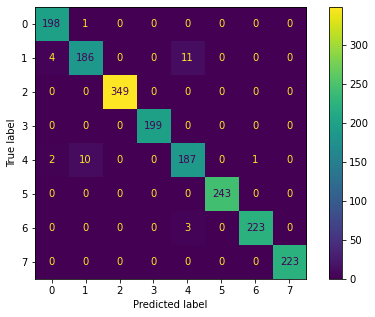

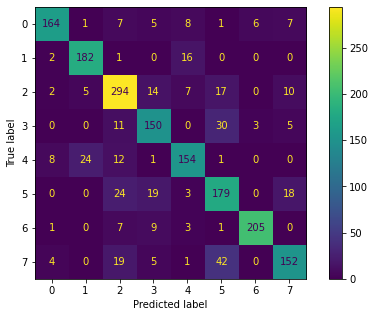

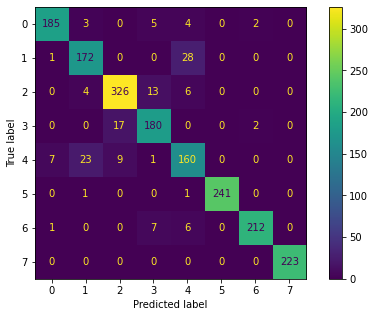

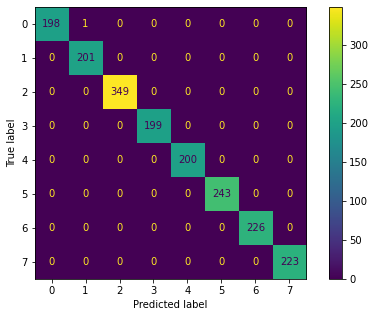

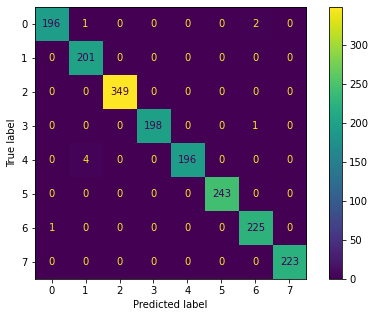

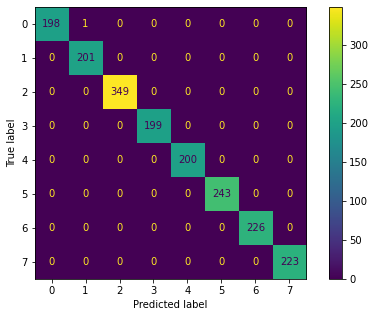

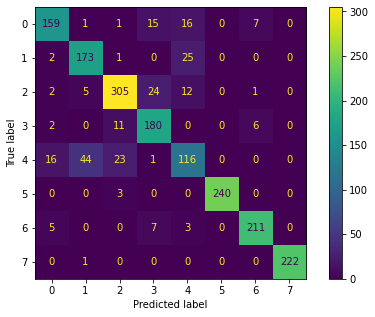

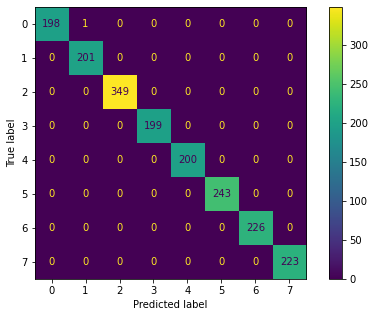

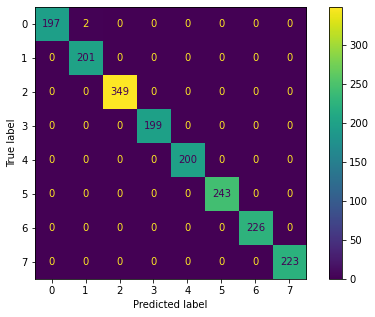

In [58]:
for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ')
    y_pred_train = models[i].predict(X_train)
    y_pred_test = models[i].predict(X_test)
    print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot())

## From the models we can observe that XGBoost, Gradient Boost, and CatBoost Classifier gives best model with 99.94565217391305% accuracy